**Proyecto Shark**


Primero importamos las librerías que vamos a usar

In [9]:
import pandas as pd
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Creamos y cargamos el dataset de trabajo en base al excel de Shark Tank

In [10]:
df = pd.read_excel("GSAF5.xls") 

print("¡Archivo cargado con éxito!")
print(df.head())


¡Archivo cargado con éxito!
            Date    Year        Type            Country  \
0   10th January  2026.0  Unprovoked          Australia   
1    8th January  2026.0  Unprovoked  US Virgin Islands   
2   3rd January   2026.0  Unprovoked      New Caledonia   
3  21st December  2025.0  Unprovoked                USA   
4  12th December  2025.0  Unprovoked                USA   

                          State                     Location      Activity  \
0                           NSW                 Avalon Beach       Surfing   
1  Fredricksted Island St Croix                 Dorsch Beach    Snorkeling   
2                          Kélé  Between Bourail and Moindou  Scuba Diving   
3                    California   Lovers Point Pacific Grove      Swimming   
4      Sonoma County California                 Salmon Creek       Surfing   

            Name Sex Age  ...                     Species   \
0   Paul Stanton   M   ?  ...                      Unknown   
1  Arlene Lillis   F  56

Veamos una descripción inicial del dataset, sin limpiar nada:

In [11]:
df.describe()

,Year,original order
count,7063.000000,6799.000000
mean,1935.890981,3401.152081
std,270.825801,1963.076319
min,0.000000,2.000000
25%,1948.000000,1701.500000
50%,1986.000000,3401.000000
75%,2010.000000,5100.500000
max,2026.000000,6802.000000


Generamos una vista general del dataset a través de una función:

In [12]:
def informe(x):
    print("Información del DataFrame:")
    print(x.info())
    print("Descripción estadística:")
    print(x.describe())
    print("Valores nulos:")
    print(x.isnull().sum())
    print("Tipos de datos:")
    print(x.dtypes)
    print("Primeras 5 filas:")
    print(x.head())
    print("Últimas 5 filas:")
    print(x.tail())
    print("Forma del DataFrame:")
    print(x.shape)
    print("columnas")
    print(x.columns)
    

In [15]:
informe(df)
    


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7065 entries, 0 to 7064
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7065 non-null   object 
 1   Year            7063 non-null   float64
 2   Type            7047 non-null   object 
 3   Country         7015 non-null   object 
 4   State           6578 non-null   object 
 5   Location        6498 non-null   object 
 6   Activity        6480 non-null   object 
 7   Name            6846 non-null   object 
 8   Sex             6486 non-null   object 
 9   Age             4070 non-null   object 
 10  Injury          7030 non-null   object 
 11  Fatal Y/N       6504 non-null   object 
 12  Time            3538 non-null   object 
 13  Species         3934 non-null   object 
 14  Source          7045 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href  

**HIPOTESIS**

1. Australia y EEUU son los países con más ataques. Aquí nos interesa ampliar info  por estado y locación y fatales.(Variables: Country, State, Location, Fatal Y/N)

Primero haremos una función para analizar los datos y las variables categóricas del excel.

In [16]:
def anali(x):
    print(x.value_counts())
    print(x.unique())
    print(x.nunique())

Ahora solo tomaremos las variables necesarias para la hipotesis a trabajar, quedando un dataset más manejable.

In [17]:
df1=df[['Country','State','Location','Fatal Y/N']]
df1

,Country,State,Location,Fatal Y/N
0,Australia,NSW,Avalon Beach,N
1,US Virgin Islands,Fredricksted Island St Croix,Dorsch Beach,Y
2,New Caledonia,Kélé,Between Bourail and Moindou,N
3,USA,California,Lovers Point Pacific Grove,Y
4,USA,Sonoma County California,Salmon Creek,N
...,...,...,...,...
7060,AUSTRALIA,Western Australia,Roebuck Bay,Y
7061,AUSTRALIA,Western Australia,NaN,Y
7062,USA,North Carolina,Ocracoke Inlet,Y
7063,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",Y


veremos el analisis con la función que creamos anteriormente para limpiar datos y analizar las variables de la hipotesis.

In [18]:
anali(df1['Country'])

Country
USA                   2578
AUSTRALIA             1482
SOUTH AFRICA           597
NEW ZEALAND            144
BAHAMAS                136
                      ... 
BAHREIN                  1
KOREA                    1
RED SEA?                 1
ASIA?                    1
CEYLON (SRI LANKA)       1
Name: count, Length: 251, dtype: int64
['Australia' 'US Virgin Islands' 'New Caledonia' 'USA' 'French Polynesia'
 'Samoa' 'Columbia' 'Costa Rica' 'Bahamas' 'Puerto Rico' 'Spain'
 'Canary Islands' 'South Africa' 'Vanuatu' 'Jamaica' 'Israel' 'Mexico'
 'Maldives' 'Philippines' 'Turks and Caicos' 'Mozambique' 'Egypt'
 'Thailand' 'New Zealand' 'Hawaii' 'Honduras' 'Indonesia' 'Morocco'
 'Belize' 'Maldive Islands' 'Tobago' 'AUSTRALIA' 'INDIA' 'TRINIDAD'
 'BAHAMAS' 'SOUTH AFRICA' 'MEXICO' 'NEW ZEALAND' 'EGYPT' 'BELIZE'
 'PHILIPPINES' 'Coral Sea' 'SPAIN' 'PORTUGAL' 'SAMOA' 'COLOMBIA' 'ECUADOR'
 'FRENCH POLYNESIA' 'NEW CALEDONIA' 'TURKS and CaICOS' 'CUBA' 'BRAZIL'
 'SEYCHELLES' 'ARGENTINA' 'FIJI'

Creamos una función de limpieza para las variables borrando los espacios en blanco y convirtiendo a mayúsculas

In [19]:
def limpiar(df,column_name):
    df_limpia=df.copy(  )
    df_limpia[column_name] = df_limpia[column_name].astype(str).str.replace('', '', regex=False).str.upper().str.strip()
    
    print(df_limpia[column_name].value_counts())
    print(df_limpia[column_name].nunique())
    return df_limpia

Como la variable Country tiene valores con el signo ?, vamos a crear una función para limpie esos datos

In [20]:
def interrogar(df,column_name):
   df_limpia2=df.copy()
   df_limpia2[column_name]=df[column_name].astype(str).str.replace('?', '', regex=False).str.upper()
   print(df_limpia2[column_name].value_counts())
   print(df_limpia2[column_name].nunique())
   return df_limpia2

In [21]:
df1["Country"].value_counts()

Country
USA                   2578
AUSTRALIA             1482
SOUTH AFRICA           597
NEW ZEALAND            144
BAHAMAS                136
                      ... 
BAHREIN                  1
KOREA                    1
RED SEA?                 1
ASIA?                    1
CEYLON (SRI LANKA)       1
Name: count, Length: 251, dtype: int64

In [22]:
df_limpia=limpiar(df1,'Country')

Country
USA                   2578
AUSTRALIA             1516
SOUTH AFRICA           599
NEW ZEALAND            146
BAHAMAS                141
                      ... 
BAHREIN                  1
KOREA                    1
RED SEA?                 1
ASIA?                    1
CEYLON (SRI LANKA)       1
Name: count, Length: 214, dtype: int64
214


In [23]:
df_limpia2=interrogar(df_limpia,'Country')

Country
USA                   2578
AUSTRALIA             1516
SOUTH AFRICA           599
NEW ZEALAND            146
BAHAMAS                141
                      ... 
DJIBOUTI                 1
BAHREIN                  1
KOREA                    1
ASIA                     1
CEYLON (SRI LANKA)       1
Name: count, Length: 211, dtype: int64
211


In [ ]:
informe(df_limpia2)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7065 entries, 0 to 7064
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    7065 non-null   object
 1   State      6578 non-null   object
 2   Location   6498 non-null   object
 3   Fatal Y/N  6504 non-null   object
dtypes: object(4)
memory usage: 220.9+ KB
None
Descripción estadística:
       Country    State                          Location Fatal Y/N
count     7065     6578                              6498      6504
unique     211      944                              4611        12
top        USA  Florida  New Smyrna Beach, Volusia County         N
freq      2578     1192                               191      4926
Valores nulos:
Country        0
State        487
Location     567
Fatal Y/N    561
dtype: int64
Tipos de datos:
Country      object
State        object
Location     object
Fatal Y/N    object
dtype: object
Primeras 5 fila

In [24]:
anali(df_limpia2['Country'])

Country
USA                   2578
AUSTRALIA             1516
SOUTH AFRICA           599
NEW ZEALAND            146
BAHAMAS                141
                      ... 
DJIBOUTI                 1
BAHREIN                  1
KOREA                    1
ASIA                     1
CEYLON (SRI LANKA)       1
Name: count, Length: 211, dtype: int64
['AUSTRALIA' 'US VIRGIN ISLANDS' 'NEW CALEDONIA' 'USA' 'FRENCH POLYNESIA'
 'SAMOA' 'COLUMBIA' 'COSTA RICA' 'BAHAMAS' 'PUERTO RICO' 'SPAIN'
 'CANARY ISLANDS' 'SOUTH AFRICA' 'VANUATU' 'JAMAICA' 'ISRAEL' 'MEXICO'
 'MALDIVES' 'PHILIPPINES' 'TURKS AND CAICOS' 'MOZAMBIQUE' 'EGYPT'
 'THAILAND' 'NEW ZEALAND' 'HAWAII' 'HONDURAS' 'INDONESIA' 'MOROCCO'
 'BELIZE' 'MALDIVE ISLANDS' 'TOBAGO' 'INDIA' 'TRINIDAD' 'CORAL SEA'
 'PORTUGAL' 'COLOMBIA' 'ECUADOR' 'CUBA' 'BRAZIL' 'SEYCHELLES' 'ARGENTINA'
 'FIJI' 'ENGLAND' 'JAPAN' 'BRITISH OVERSEAS TERRITORY' 'CANADA' 'JORDAN'
 'ST KITTS / NEVIS' 'ST MARTIN' 'PAPUA NEW GUINEA' 'REUNION ISLAND'
 'CHINA' 'IRELAND' 'ITALY' 'M

Observamos que ya tenemos los valores limpios con 211 paises y sin nulos.

In [25]:
df_limpia2

,Country,State,Location,Fatal Y/N
0,AUSTRALIA,NSW,Avalon Beach,N
1,US VIRGIN ISLANDS,Fredricksted Island St Croix,Dorsch Beach,Y
2,NEW CALEDONIA,Kélé,Between Bourail and Moindou,N
3,USA,California,Lovers Point Pacific Grove,Y
4,USA,Sonoma County California,Salmon Creek,N
...,...,...,...,...
7060,AUSTRALIA,Western Australia,Roebuck Bay,Y
7061,AUSTRALIA,Western Australia,NaN,Y
7062,USA,North Carolina,Ocracoke Inlet,Y
7063,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",Y


Ahora haremos una función para analizar duplicados y nulos 

In [26]:
def datos(x):
    print("datos nulos")
    print(x.isnull().sum())
    print("datos totales")
    print(x.count())   
    print("porcentaje de nulos")
    print(x.isnull().sum() / x.shape[0]*100)
    print("datos duplicados")
    print(x.duplicated().sum())

In [27]:
datos(df_limpia2)

datos nulos
Country        0
State        487
Location     567
Fatal Y/N    561
dtype: int64
datos totales
Country      7065
State        6578
Location     6498
Fatal Y/N    6504
dtype: int64
porcentaje de nulos
Country      0.000000
State        6.893135
Location     8.025478
Fatal Y/N    7.940552
dtype: float64
datos duplicados
1620


Ahora vamos a limpiar la columna Fatal y N/Y ya que tiene datos nulos y necesitamos solo 2 datos. Creamos la función:

In [28]:
def clean_yes_no_column(df, column_name):

    df_clean = df.copy()
    
    df_clean[column_name] = df_clean[column_name].astype(str).str.upper().str.strip()
    
    df_clean = df_clean[df_clean[column_name].isin(["Y", "N"])]
    
    print(f"Valores únicos en '{column_name}':", df_clean[column_name].unique())
    
    return df_clean

Creamos nuestro nuevo data frame de trabajo y lo analizamos:

In [29]:
df_limpia3=clean_yes_no_column(df_limpia2, "Fatal Y/N")

Valores únicos en 'Fatal Y/N': ['N' 'Y']


In [30]:
informe(df_limpia3)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 6422 entries, 0 to 7064
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    6422 non-null   object
 1   State      5996 non-null   object
 2   Location   5926 non-null   object
 3   Fatal Y/N  6422 non-null   object
dtypes: object(4)
memory usage: 250.9+ KB
None
Descripción estadística:
       Country    State                          Location Fatal Y/N
count     6422     5996                              5926      6422
unique     201      875                              4246         2
top        USA  Florida  New Smyrna Beach, Volusia County         N
freq      2366     1116                               188      4935
Valores nulos:
Country        0
State        426
Location     496
Fatal Y/N      0
dtype: int64
Tipos de datos:
Country      object
State        object
Location     object
Fatal Y/N    object
dtype: object
Primeras 5 filas:
  

In [31]:
datos(df_limpia3)

datos nulos
Country        0
State        426
Location     496
Fatal Y/N      0
dtype: int64
datos totales
Country      6422
State        5996
Location     5926
Fatal Y/N    6422
dtype: int64
porcentaje de nulos
Country      0.000000
State        6.633448
Location     7.723451
Fatal Y/N    0.000000
dtype: float64
datos duplicados
1580


Listo limpios Country y Fatal Y/N

In [32]:
df_limpia3

,Country,State,Location,Fatal Y/N
0,AUSTRALIA,NSW,Avalon Beach,N
1,US VIRGIN ISLANDS,Fredricksted Island St Croix,Dorsch Beach,Y
2,NEW CALEDONIA,Kélé,Between Bourail and Moindou,N
3,USA,California,Lovers Point Pacific Grove,Y
4,USA,Sonoma County California,Salmon Creek,N
...,...,...,...,...
7060,AUSTRALIA,Western Australia,Roebuck Bay,Y
7061,AUSTRALIA,Western Australia,NaN,Y
7062,USA,North Carolina,Ocracoke Inlet,Y
7063,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",Y


Para trabajar en nuestra hipotesis, cambiamos nuestra columna Fatal Y/N por 1 y 0 , siendo 1 fatales y 0 no fatales (para luego contarlos y sumarlos)

In [33]:
df_limpia3['Fatal Y/N'] = df_limpia3['Fatal Y/N'].map({'Y': 1, 'N': 0})
df_limpia3

,Country,State,Location,Fatal Y/N
0,AUSTRALIA,NSW,Avalon Beach,0
1,US VIRGIN ISLANDS,Fredricksted Island St Croix,Dorsch Beach,1
2,NEW CALEDONIA,Kélé,Between Bourail and Moindou,0
3,USA,California,Lovers Point Pacific Grove,1
4,USA,Sonoma County California,Salmon Creek,0
...,...,...,...,...
7060,AUSTRALIA,Western Australia,Roebuck Bay,1
7061,AUSTRALIA,Western Australia,NaN,1
7062,USA,North Carolina,Ocracoke Inlet,1
7063,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",1


Además, la hipotesis se centra en los ataques en Australia y Estados Unidos, haremos un filtro para ver los datos de estos dos países.

In [34]:
paises_interes = ['AUSTRALIA', 'USA']
df_paises = df_limpia3[df_limpia3['Country'].isin(paises_interes)]
df_paises

,Country,State,Location,Fatal Y/N
0,AUSTRALIA,NSW,Avalon Beach,0
3,USA,California,Lovers Point Pacific Grove,1
4,USA,Sonoma County California,Salmon Creek,0
5,USA,Hawaii West Coast Big Island,"Ka'alu""alu Beach",0
6,AUSTRALIA,NSW,Crowdy Bay,0
...,...,...,...,...
7058,AUSTRALIA,NaN,NaN,1
7059,AUSTRALIA,New South Wales,,1
7060,AUSTRALIA,Western Australia,Roebuck Bay,1
7061,AUSTRALIA,Western Australia,NaN,1


Agrupamos por Country, State y Location, y calculamos el total de ataques con el total de accidentes fatales. 

In [35]:
df_hipotesis = df_paises.groupby(['Country', 'State', 'Location'])['Fatal Y/N'].agg(['count', 'sum']).reset_index()
df_hipotesis

,Country,State,Location,count,sum
0,AUSTRALIA,NSW,Avalon Beach,1,0
1,AUSTRALIA,NSW,Cabarita Beach,1,0
2,AUSTRALIA,NSW,Crowdy Bay,2,1
3,AUSTRALIA,NSW,Gunyah beach Bundeena Port Hacking,1,0
4,AUSTRALIA,NSW,Long Reef Sydney,1,1
...,...,...,...,...,...
2492,USA,Virginia,"Virginia Beach, Princess Anne County",2,0
2493,USA,Virginia,"Wreck of the Navy Barge, 22 miles SE of Rudee",1,0
2494,USA,Wake Island,Wilkes Islet Lagoon (Pacific Ocean north of th...,1,0
2495,USA,Washington,"Pacific Beach, Grays Harbor County",1,0


Renombramos las columnas para mayor claridad count es total de ataques y sum es total de fatales

In [36]:
df_hipotesis = df_hipotesis.rename(columns={'count': 'Total_Ataques', 'sum': 'Ataques_Fatales'})
df_hipotesis

,Country,State,Location,Total_Ataques,Ataques_Fatales
0,AUSTRALIA,NSW,Avalon Beach,1,0
1,AUSTRALIA,NSW,Cabarita Beach,1,0
2,AUSTRALIA,NSW,Crowdy Bay,2,1
3,AUSTRALIA,NSW,Gunyah beach Bundeena Port Hacking,1,0
4,AUSTRALIA,NSW,Long Reef Sydney,1,1
...,...,...,...,...,...
2492,USA,Virginia,"Virginia Beach, Princess Anne County",2,0
2493,USA,Virginia,"Wreck of the Navy Barge, 22 miles SE of Rudee",1,0
2494,USA,Wake Island,Wilkes Islet Lagoon (Pacific Ocean north of th...,1,0
2495,USA,Washington,"Pacific Beach, Grays Harbor County",1,0


Ordenamos por los lugares con más ataques totales

In [37]:
df_hipotesis = df_hipotesis.sort_values(by='Total_Ataques', ascending=False)
df_hipotesis

,Country,State,Location,Total_Ataques,Ataques_Fatales
1613,USA,Florida,"New Smyrna Beach, Volusia County",188,0
1416,USA,Florida,"Daytona Beach, Volusia County",31,0
1691,USA,Florida,"Ponce Inlet, Volusia County",28,0
2379,USA,South Carolina,"Myrtle Beach, Horry County",21,0
1569,USA,Florida,"Melbourne Beach, Brevard County",19,0
...,...,...,...,...,...
1,AUSTRALIA,NSW,Cabarita Beach,1,0
2466,USA,Texas,"Sunday Beach, Matagorda Island, Calhoun County",1,0
2467,USA,Texas,Surfside Beach,1,0
2468,USA,Texas,"Surfside Beach, Brazoria County",1,0


Haremos un grafico de barras para comparar ambos países con más ataques totales

<Axes: xlabel='Country', ylabel='count'>

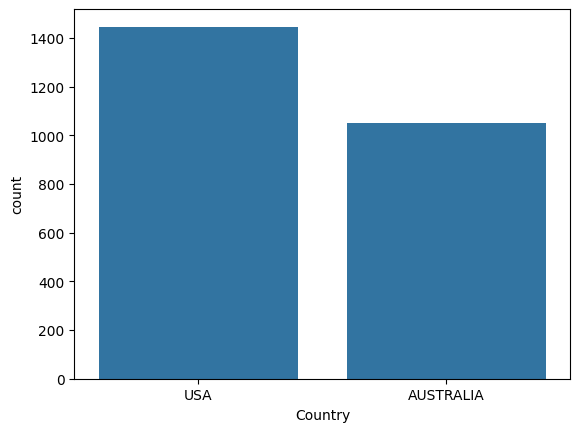

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Country",data=df_hipotesis)

Ordenamos por total de ataques fatales

In [38]:
orden= df_hipotesis.sort_values(by='Ataques_Fatales', ascending=False)
orden

,Country,State,Location,Total_Ataques,Ataques_Fatales
571,AUSTRALIA,Queensland,"Ross River, Townsville",7,5
1675,USA,Florida,"Pensacola Bay, Escambia County",5,4
2347,USA,South Carolina,"Charleston Harbor, Charleston County",3,3
600,AUSTRALIA,Queensland,Townsville,5,3
294,AUSTRALIA,New South Wales,"Stockton Beach, Newcastle",4,3
...,...,...,...,...,...
1739,USA,Florida,"Singer Island, Riviera Beach, Palm Beach County",10,0
1443,USA,Florida,"Florida Keys, Monroe County",10,0
1755,USA,Florida,"South of Ponce Inlet, Volusia County",2,0
1800,USA,Florida,"Vero Beach, Indian River County",9,0


Crearemos una nueva columna que muestre el porcentaje de ataques fatales y aproximemos el resultado a 2 decimales.

In [39]:

orden['Porcentaje_Muerte'] = (orden['Ataques_Fatales'] / orden['Total_Ataques']) * 100

orden['Porcentaje_Muerte'] = orden['Porcentaje_Muerte'].round(2)

orden

,Country,State,Location,Total_Ataques,Ataques_Fatales,Porcentaje_Muerte
571,AUSTRALIA,Queensland,"Ross River, Townsville",7,5,71.43
1675,USA,Florida,"Pensacola Bay, Escambia County",5,4,80.00
2347,USA,South Carolina,"Charleston Harbor, Charleston County",3,3,100.00
600,AUSTRALIA,Queensland,Townsville,5,3,60.00
294,AUSTRALIA,New South Wales,"Stockton Beach, Newcastle",4,3,75.00
...,...,...,...,...,...,...
1739,USA,Florida,"Singer Island, Riviera Beach, Palm Beach County",10,0,0.00
1443,USA,Florida,"Florida Keys, Monroe County",10,0,0.00
1755,USA,Florida,"South of Ponce Inlet, Volusia County",2,0,0.00
1800,USA,Florida,"Vero Beach, Indian River County",9,0,0.00


Filtraremos los datos considerados peligrosos, es decir, aquellos donde el porcentaje de muerte sea mayor o igual al 50%.

In [40]:
df_peligrosos = orden[orden['Porcentaje_Muerte'] >= 50]

df_peligrosos

,Country,State,Location,Total_Ataques,Ataques_Fatales,Porcentaje_Muerte
571,AUSTRALIA,Queensland,"Ross River, Townsville",7,5,71.43
1675,USA,Florida,"Pensacola Bay, Escambia County",5,4,80.00
2347,USA,South Carolina,"Charleston Harbor, Charleston County",3,3,100.00
600,AUSTRALIA,Queensland,Townsville,5,3,60.00
294,AUSTRALIA,New South Wales,"Stockton Beach, Newcastle",4,3,75.00
...,...,...,...,...,...,...
7,AUSTRALIA,NSW,Off Port Stephens near Newcastle,1,1,100.00
10,AUSTRALIA,New South Wales,,1,1,100.00
14,AUSTRALIA,New South Wales,"St. George’s River at Moorebank, near Milperr...",1,1,100.00
15,AUSTRALIA,New South Wales,"""Bellynahinch"" on the Manning River",1,1,100.00


Agruparemos los datos por país y contaremos cuántos casos peligrosos hay en cada uno.

In [43]:
casos = df_peligrosos.groupby('Country').size().reset_index(name='total_ataques_peligrosos')
casos

,Country,total_ataques_peligrosos
0,AUSTRALIA,246
1,USA,153


Si analizamos el total de ataques comparados con el total de muertos, revisamos los paises con más muertos y nos sale que australia tiene mas muerto que EEUU

<Axes: xlabel='Country', ylabel='total_ataques_peligrosos'>

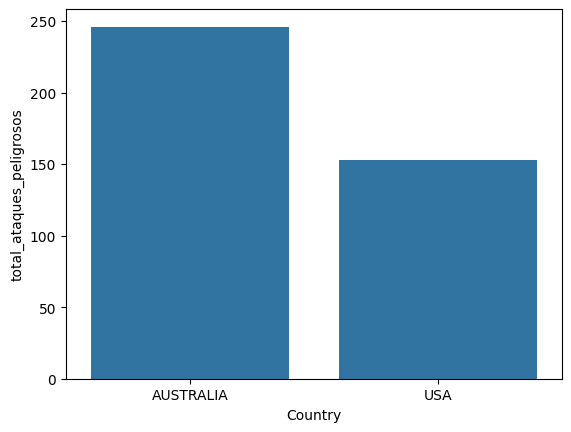

In [44]:

import seaborn as sns
sns.barplot(x="Country",y="total_ataques_peligrosos",data=casos)

2. Las actividades deportivas como el surf tienen más riesgo que las actividades de los bañistas. Aquí nos interesa ampliar en que horario hay más riesgo. (Variables: Activity, Fatal Y/N, Time)

## Limpieza de Fatal N/Y

Como la variable Fatal Y/N tiene valores diferentes a "Y" y "N", hacemos una función que convierta todo a mayúsculas, elimine los espacios extra y filtre solo los resultados válidos (Y/N):

In [ ]:
def clean_yes_no_column(df, column_name):

    df_clean = df.copy()
    
    df_clean[column_name] = df_clean[column_name].astype(str).str.upper().str.strip()
    
    df_clean = df_clean[df_clean[column_name].isin(["Y", "N"])]
    
    print(f"Valores únicos en '{column_name}':", df_clean[column_name].unique())
    
    return df_clean

In [ ]:
df_clean = df.copy()

df_clean["Fatal Y/N"] = df_clean["Fatal Y/N"].astype(str).str.upper().str.strip()

df_clean = df_clean[df_clean["Fatal Y/N"].isin(["Y", "N"])]

print(df_clean["Fatal Y/N"].unique())

['N' 'Y']


3.Los ataques no provocados son más frecuentes y, además, presentan una mayor proporción de casos no fatales que los ataques provocados. (Variables: Type, Fatal Y/N)

Creamos el dataset de trabajo para el análisis de Type y Fatal Y/N:

In [45]:
dfhip3 = df[["Type","Fatal Y/N"]]
dfhip3

,Type,Fatal Y/N
0,Unprovoked,N
1,Unprovoked,Y
2,Unprovoked,N
3,Unprovoked,Y
4,Unprovoked,N
...,...,...
7060,Unprovoked,Y
7061,Unprovoked,Y
7062,Unprovoked,Y
7063,Unprovoked,Y


Analizamos en la función el Type

In [46]:
anali(dfhip3["Type"])

Type
Unprovoked             5217
Provoked                641
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             26
Boat                      7
 Provoked                 2
unprovoked                1
Unconfirmed               1
?                         1
Unverified                1
Under investigation       1
Name: count, dtype: int64
['Unprovoked' 'Provoked' 'Questionable' 'unprovoked' ' Provoked'
 'Watercraft' 'Sea Disaster' nan '?' 'Unconfirmed' 'Unverified' 'Invalid'
 'Under investigation' 'Boat']
13


Ahora limpiamos la columna Type con la función de limpieza:

In [48]:
dfhip3 = dfhip3.dropna(subset=["Type"])

In [51]:
limpieza_type = limpiar(dfhip3,"Type")
limpieza_type

Type
UNPROVOKED             5218
PROVOKED                643
INVALID                 552
WATERCRAFT              355
SEA DISASTER            242
QUESTIONABLE             26
BOAT                      7
UNCONFIRMED               1
?                         1
UNVERIFIED                1
UNDER INVESTIGATION       1
Name: count, dtype: int64
11


,Type,Fatal Y/N
0,UNPROVOKED,N
1,UNPROVOKED,Y
2,UNPROVOKED,N
3,UNPROVOKED,Y
4,UNPROVOKED,N
...,...,...
7060,UNPROVOKED,Y
7061,UNPROVOKED,Y
7062,UNPROVOKED,Y
7063,UNPROVOKED,Y


In [52]:
limpieza_type = limpiar(dfhip3,"Type")
limpieza_type

Type
UNPROVOKED             5218
PROVOKED                643
INVALID                 552
WATERCRAFT              355
SEA DISASTER            242
QUESTIONABLE             26
BOAT                      7
UNCONFIRMED               1
?                         1
UNVERIFIED                1
UNDER INVESTIGATION       1
Name: count, dtype: int64
11


,Type,Fatal Y/N
0,UNPROVOKED,N
1,UNPROVOKED,Y
2,UNPROVOKED,N
3,UNPROVOKED,Y
4,UNPROVOKED,N
...,...,...
7060,UNPROVOKED,Y
7061,UNPROVOKED,Y
7062,UNPROVOKED,Y
7063,UNPROVOKED,Y


In [53]:
df_typefinal=interrogar(limpieza_type,"Type")
df_typefinal

Type
UNPROVOKED             5218
PROVOKED                643
INVALID                 552
WATERCRAFT              355
SEA DISASTER            242
QUESTIONABLE             26
BOAT                      7
UNCONFIRMED               1
                          1
UNVERIFIED                1
UNDER INVESTIGATION       1
Name: count, dtype: int64
11


,Type,Fatal Y/N
0,UNPROVOKED,N
1,UNPROVOKED,Y
2,UNPROVOKED,N
3,UNPROVOKED,Y
4,UNPROVOKED,N
...,...,...
7060,UNPROVOKED,Y
7061,UNPROVOKED,Y
7062,UNPROVOKED,Y
7063,UNPROVOKED,Y


In [54]:
dfhip3_limpia = df_typefinal[df_typefinal['Type'].str.strip() != ""]
dfhip3_limpia

,Type,Fatal Y/N
0,UNPROVOKED,N
1,UNPROVOKED,Y
2,UNPROVOKED,N
3,UNPROVOKED,Y
4,UNPROVOKED,N
...,...,...
7060,UNPROVOKED,Y
7061,UNPROVOKED,Y
7062,UNPROVOKED,Y
7063,UNPROVOKED,Y


In [55]:
anali(dfhip3_limpia["Type"])

Type
UNPROVOKED             5218
PROVOKED                643
INVALID                 552
WATERCRAFT              355
SEA DISASTER            242
QUESTIONABLE             26
BOAT                      7
UNCONFIRMED               1
UNVERIFIED                1
UNDER INVESTIGATION       1
Name: count, dtype: int64
['UNPROVOKED' 'PROVOKED' 'QUESTIONABLE' 'WATERCRAFT' 'SEA DISASTER'
 'UNCONFIRMED' 'UNVERIFIED' 'INVALID' 'UNDER INVESTIGATION' 'BOAT']
10


Aqui igualamos el type de accidente que es igual BOAT con WATERCRAFT

In [56]:
dfhip3_limpia["Type"] = dfhip3_limpia["Type"].replace("BOAT","WATERCRAFT")

C:\Users\tachi\AppData\Local\Temp\ipykernel_40844\1457485315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfhip3_limpia["Type"] = dfhip3_limpia["Type"].replace("BOAT","WATERCRAFT")


In [57]:
anali(dfhip3_limpia["Type"])

Type
UNPROVOKED             5218
PROVOKED                643
INVALID                 552
WATERCRAFT              362
SEA DISASTER            242
QUESTIONABLE             26
UNCONFIRMED               1
UNVERIFIED                1
UNDER INVESTIGATION       1
Name: count, dtype: int64
['UNPROVOKED' 'PROVOKED' 'QUESTIONABLE' 'WATERCRAFT' 'SEA DISASTER'
 'UNCONFIRMED' 'UNVERIFIED' 'INVALID' 'UNDER INVESTIGATION']
9


Quedaron al final 9 tipos de accidente

In [58]:
def clean_yes_no_column(df, column_name):

    df_clean = df.copy()
    
    df_clean[column_name] = df_clean[column_name].astype(str).str.upper().str.strip()
    
    df_clean = df_clean[df_clean[column_name].isin(["Y", "N"])]
    
    print(f"Valores únicos en '{column_name}':", df_clean[column_name].unique())
    
    return df_clean

In [59]:
df_fatal=clean_yes_no_column(dfhip3_limpia,"Fatal Y/N")
df_fatal

Valores únicos en 'Fatal Y/N': ['N' 'Y']


,Type,Fatal Y/N
0,UNPROVOKED,N
1,UNPROVOKED,Y
2,UNPROVOKED,N
3,UNPROVOKED,Y
4,UNPROVOKED,N
...,...,...
7060,UNPROVOKED,Y
7061,UNPROVOKED,Y
7062,UNPROVOKED,Y
7063,UNPROVOKED,Y


Analizamos el data frame resultante

In [60]:
anali(df_fatal["Fatal Y/N"])

Fatal Y/N
N    4925
Y    1483
Name: count, dtype: int64
['N' 'Y']
2


In [62]:
informe(df_fatal)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 6408 entries, 0 to 7064
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       6408 non-null   object
 1   Fatal Y/N  6408 non-null   object
dtypes: object(2)
memory usage: 150.2+ KB
None
Descripción estadística:
              Type Fatal Y/N
count         6408      6408
unique           8         2
top     UNPROVOKED         N
freq          5139      4925
Valores nulos:
Type         0
Fatal Y/N    0
dtype: int64
Tipos de datos:
Type         object
Fatal Y/N    object
dtype: object
Primeras 5 filas:
         Type Fatal Y/N
0  UNPROVOKED         N
1  UNPROVOKED         Y
2  UNPROVOKED         N
3  UNPROVOKED         Y
4  UNPROVOKED         N
Últimas 5 filas:
            Type Fatal Y/N
7060  UNPROVOKED         Y
7061  UNPROVOKED         Y
7062  UNPROVOKED         Y
7063  UNPROVOKED         Y
7064  UNPROVOKED         Y
Forma del DataFrame:
(6408, 2)

Observamos como queda el dataframe sin datos nulos

In [61]:
df_fatal


,Type,Fatal Y/N
0,UNPROVOKED,N
1,UNPROVOKED,Y
2,UNPROVOKED,N
3,UNPROVOKED,Y
4,UNPROVOKED,N
...,...,...
7060,UNPROVOKED,Y
7061,UNPROVOKED,Y
7062,UNPROVOKED,Y
7063,UNPROVOKED,Y


Agrupamos los datos por tipo de accidente 

In [63]:
agrupado = df_fatal.groupby('Type').size().reset_index(name='Count')
agrupado

,Type,Count
0,INVALID,25
1,PROVOKED,634
2,QUESTIONABLE,22
3,SEA DISASTER,236
4,UNDER INVESTIGATION,1
5,UNPROVOKED,5139
6,UNVERIFIED,1
7,WATERCRAFT,350


Ordenamos los datos por tipo de accidente

In [64]:
ordenado=agrupado.sort_values(by="Count",ascending=False)
ordenado

,Type,Count
5,UNPROVOKED,5139
1,PROVOKED,634
7,WATERCRAFT,350
3,SEA DISASTER,236
0,INVALID,25
2,QUESTIONABLE,22
4,UNDER INVESTIGATION,1
6,UNVERIFIED,1


Ahora cambiaremos Fatal Y/N por binario para agruparlos

In [65]:
df_fatal["Fatal Y/N"] = df_fatal['Fatal Y/N'].map({'Y': 1, 'N': 0})
df_fatal

,Type,Fatal Y/N
0,UNPROVOKED,0
1,UNPROVOKED,1
2,UNPROVOKED,0
3,UNPROVOKED,1
4,UNPROVOKED,0
...,...,...
7060,UNPROVOKED,1
7061,UNPROVOKED,1
7062,UNPROVOKED,1
7063,UNPROVOKED,1


In [67]:
df_hipotesis3 = df_fatal.groupby('Type')['Fatal Y/N'].agg(['count', 'sum']).reset_index()

df_hipotesis3=df_hipotesis3.rename(columns={'count': 'Total_Ataques', 'sum': 'Ataques_Fatales'})
df_hipotesis3

,Type,Total_Ataques,Ataques_Fatales
0,INVALID,25,8
1,PROVOKED,634,21
2,QUESTIONABLE,22,8
3,SEA DISASTER,236,169
4,UNDER INVESTIGATION,1,0
5,UNPROVOKED,5139,1266
6,UNVERIFIED,1,0
7,WATERCRAFT,350,11


In [68]:
ordenado= df_hipotesis3.sort_values(by= 'Ataques_Fatales', ascending=False)
ordenado

,Type,Total_Ataques,Ataques_Fatales
5,UNPROVOKED,5139,1266
3,SEA DISASTER,236,169
1,PROVOKED,634,21
7,WATERCRAFT,350,11
2,QUESTIONABLE,22,8
0,INVALID,25,8
4,UNDER INVESTIGATION,1,0
6,UNVERIFIED,1,0


Veamos el porcentaje de ataques fatales por tipo de accidente. Agregamos una columna con el porcentaje redondeado a 2 decimales

In [69]:
ordenado['Porcentaje_Muerte'] = (ordenado['Ataques_Fatales'] / ordenado['Total_Ataques']) * 100

ordenado['Porcentaje_Muerte'] = ordenado['Porcentaje_Muerte'].round(2)


ordenado


,Type,Total_Ataques,Ataques_Fatales,Porcentaje_Muerte
5,UNPROVOKED,5139,1266,24.64
3,SEA DISASTER,236,169,71.61
1,PROVOKED,634,21,3.31
7,WATERCRAFT,350,11,3.14
2,QUESTIONABLE,22,8,36.36
0,INVALID,25,8,32.00
4,UNDER INVESTIGATION,1,0,0.00
6,UNVERIFIED,1,0,0.00
